drop features from pairs with r > .95 to avoid multicollinearity


In [20]:
# setup

import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# add the root of the project to the path
sys.path.append("/Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/src")

from config.constants import GIT_DIRECTORY
from data_preparation.feature_set_helpers import correlation_matrix

id_column = "Subject_ID"
task_name = "picnicScene"

# load data
df = pd.read_csv(f"{GIT_DIRECTORY}/results/features/cleaned/{task_name}_cleaned.csv")

feature_cols = [col for col in df.columns if col != id_column]

saved correlation matrix to: /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/correlation_matrix/picnicScene_correlation_matrix.png


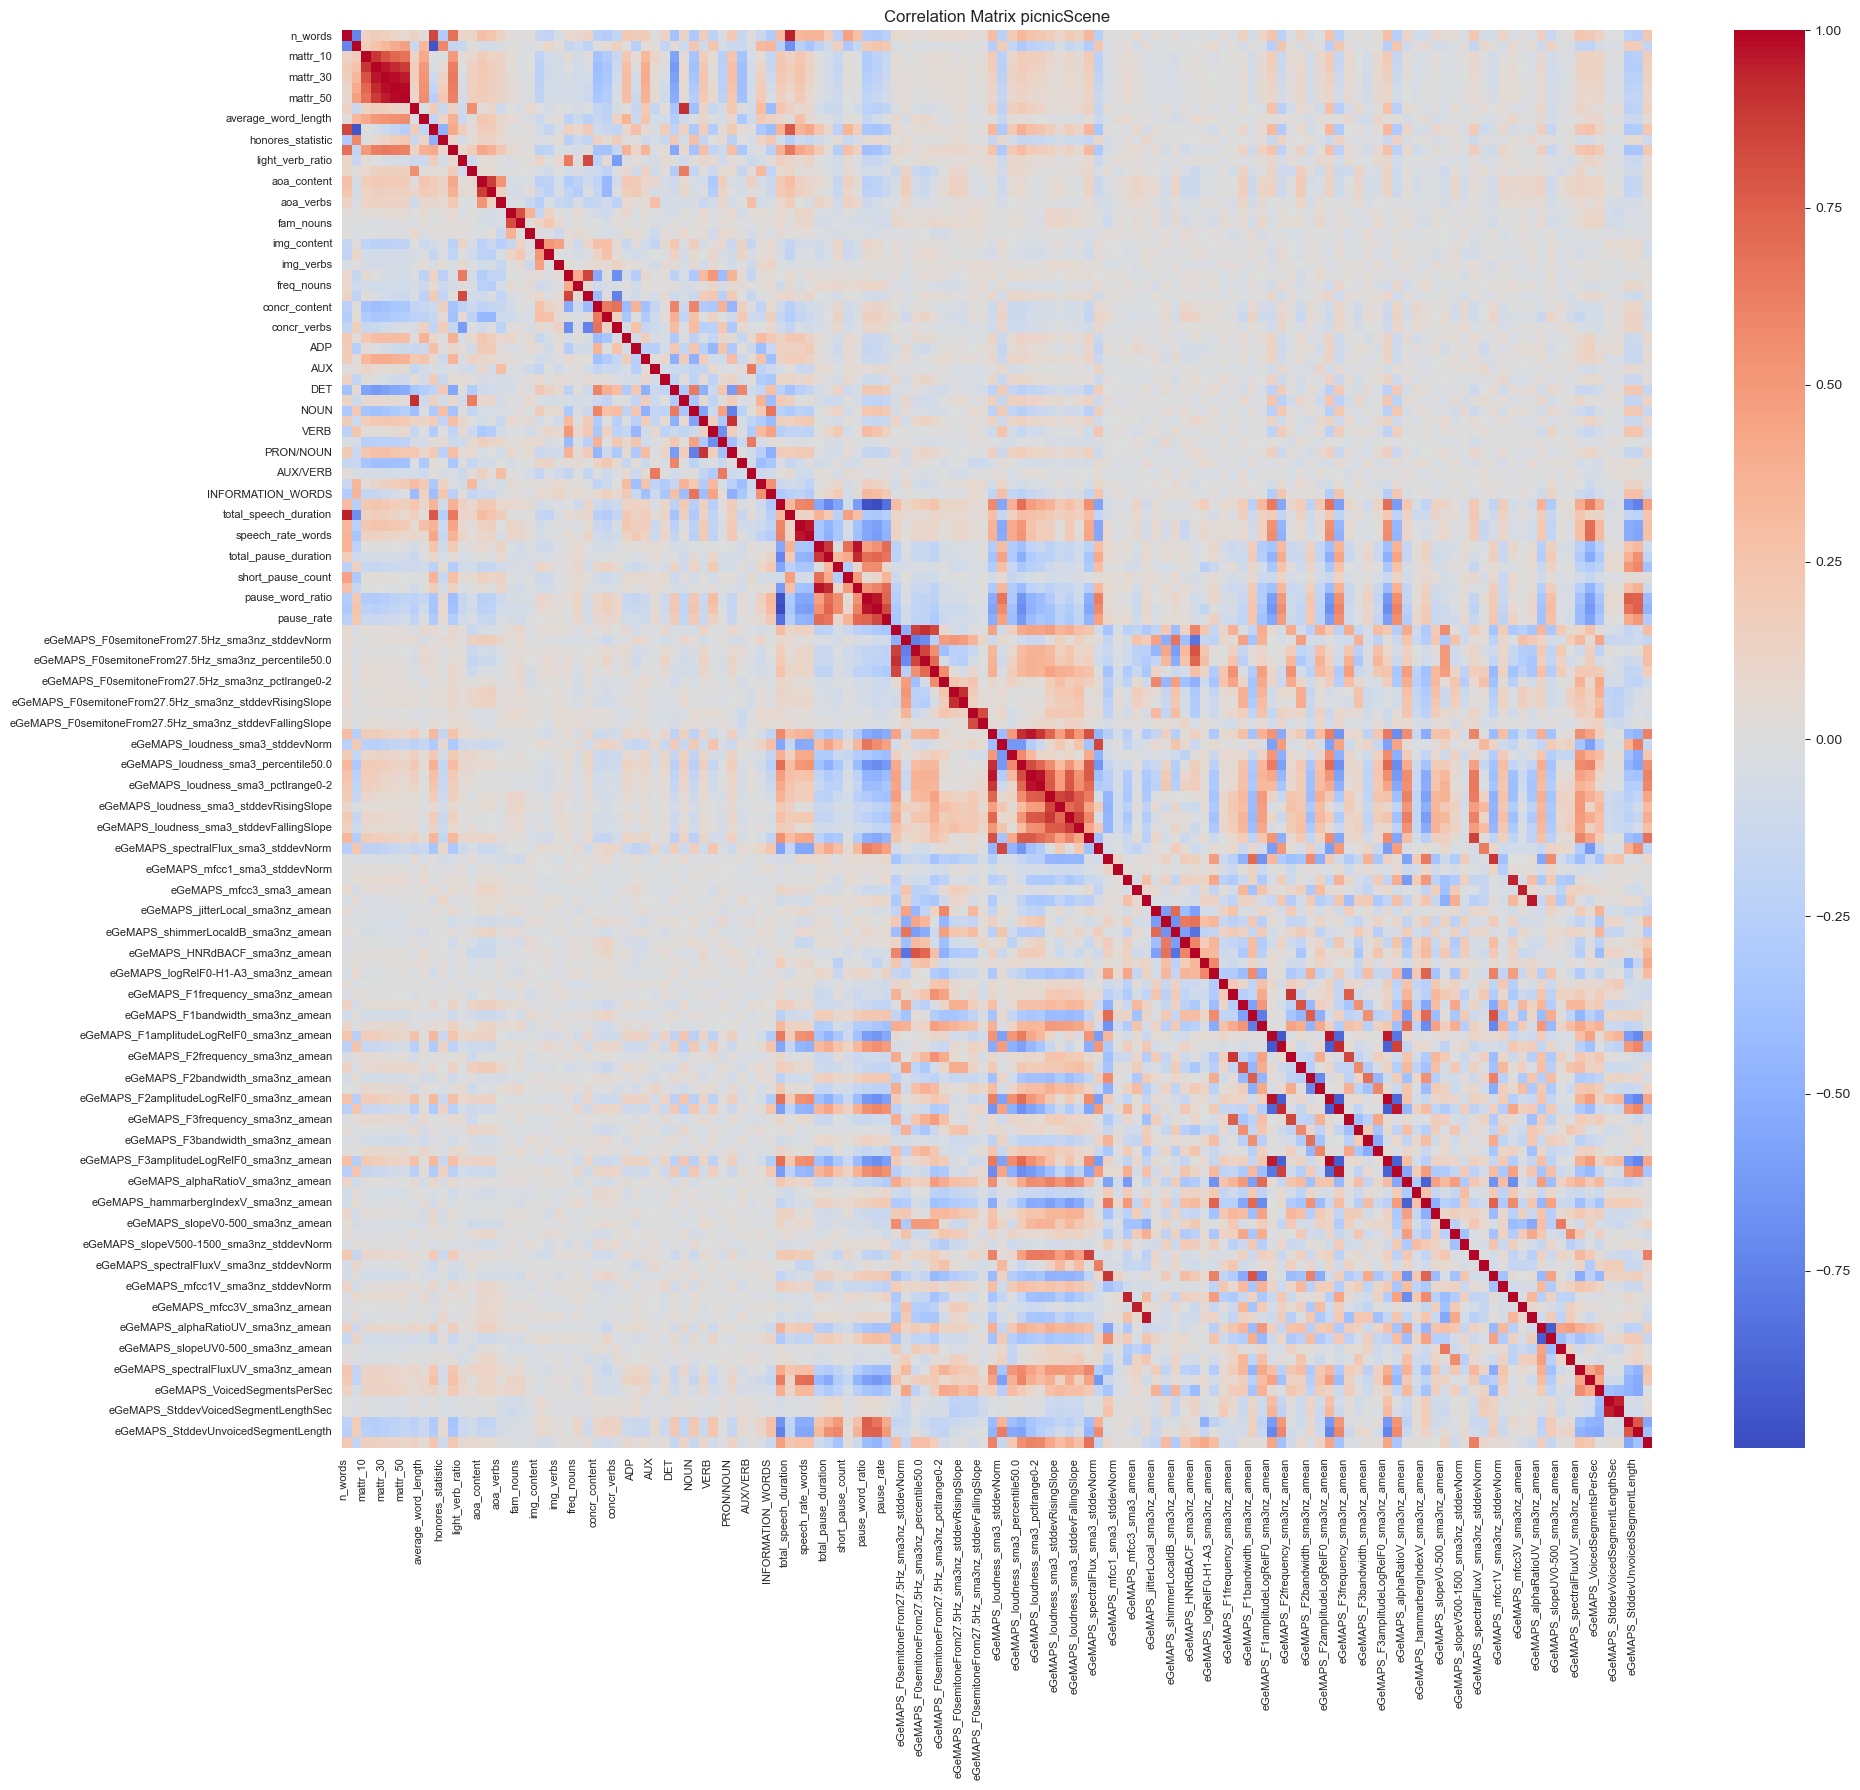

found 18 highly correlated feature pairs (|r| > 0.95):

                                        feature_1  \
0                                        mattr_30   
1                                        mattr_40   
2                                        mattr_50   
3                                        mattr_50   
4                                   brunets_index   
5                               speech_rate_words   
6                                long_pause_count   
7                                pause_word_ratio   
8                                     pause_ratio   
9                                     pause_ratio   
10           eGeMAPS_loudness_sma3_percentile80.0   
11             eGeMAPS_loudness_sma3_pctlrange0-2   
12       eGeMAPS_F2amplitudeLogRelF0_sma3nz_amean   
13       eGeMAPS_F3amplitudeLogRelF0_sma3nz_amean   
14       eGeMAPS_F3amplitudeLogRelF0_sma3nz_amean   
15  eGeMAPS_F3amplitudeLogRelF0_sma3nz_stddevNorm   
16                    eGeMAPS_mfcc3V_sma3nz

In [21]:
# find highly correlated pairs
save_path = os.path.join(GIT_DIRECTORY, "results/plots/correlation_matrix", f"{task_name}_correlation_matrix.png")
corr_matrix = correlation_matrix(df, feature_cols, task_name=task_name, save_path=save_path)

threshold = 0.95
highly_correlated = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]
            corr_val = corr_matrix.iloc[i, j]
            highly_correlated.append({
                "feature_1": col1,
                "feature_2": col2,
                "correlation": round(corr_val, 4)
            })

highly_correlated_df = pd.DataFrame(highly_correlated)

print(f"found {len(highly_correlated)} highly correlated feature pairs (|r| > {threshold}):\n")
print(highly_correlated_df)

correlated_features_path = os.path.join(GIT_DIRECTORY, "results/data_preparation/correlated_features", f"{task_name}_correlated_features.csv")
highly_correlated_df.to_csv(correlated_features_path, index=False)
print(f"saved highly correlated feature pairs to {correlated_features_path}")

In [22]:
# select features to drop based on list above

features_to_drop_cookieTheft = [
    "mattr_50", # most missing values
    "mattr_40", # more missing values than mattr_30
    "mattr_20", # maybe bigger difference from mattr_10 for mattr_30
    "speech_rate_words", # more sources for phonemes than words
    "long_pause_count", # more missing values than n_pauses
    "pause_ratio", # one missing value more
    "eGeMAPS_loudness_sma3_percentile80.0", # eGeMAPS_loudness_sma3_amean higher feature importance according to Niemelä et al. (2024)
    "eGeMAPS_F1amplitudeLogRelF0_sma3nz_amean", # lower feature importance according to Niemelä et al. (2024)
    "eGeMAPS_F2amplitudeLogRelF0_sma3nz_amean", # lower feature importance according to Niemelä et al. (2024)
    "eGeMAPS_F2amplitudeLogRelF0_sma3nz_stddevNorm", # lower feature importance according to Niemelä et al. (2024)
    "eGeMAPS_mfcc4V_sma3nz_amean", # lower feature importance according to Niemelä et al. (2024)
    "eGeMAPS_StddevVoicedSegmentLengthSec" # lower feature importance according to Niemelä et al. (2024)
]

features_to_drop_picnicScene = [
    "mattr_50", # most missing values
    "mattr_40", # more missing values than mattr_30
    "mattr_20", # maybe bigger difference from mattr_10 for mattr_30
    "speech_rate_words", # more sources for phonemes than words
    "long_pause_count", # more missing values than n_pauses
    "ttr", # mattr is more stable than ttr, keep brunet's index
    "pause_word_ratio", # one missing value more
    "pause_ratio", # better performance for phonation_rate in study by Fraser et al. (2014)
    "eGeMAPS_loudness_sma3_percentile80.0", # eGeMAPS_loudness_sma3_amean higher feature importance according to Niemelä et al. (2024)
    "eGeMAPS_F1amplitudeLogRelF0_sma3nz_amean", # lower feature importance according to Niemelä et al. (2024)
    "eGeMAPS_F2amplitudeLogRelF0_sma3nz_amean", # lower feature importance according to Niemelä et al. (2024)
    "eGeMAPS_F2amplitudeLogRelF0_sma3nz_stddevNorm", # lower feature importance according to Niemelä et al. (2024)
    "eGeMAPS_mfcc3_sma3_amean", # lower feature importance according to Niemelä et al. (2024)
    "eGeMAPS_mfcc4V_sma3nz_amean", # lower feature importance according to Niemelä et al. (2024)
]

features_to_drop_journaling = [
    "mattr_50", # most missing values
    "mattr_40", # more missing values than mattr_30
    "mattr_20", # maybe bigger difference from mattr_10 for mattr_30
    "speech_rate_words", # more sources for phonemes than words
    "long_pause_count", # more missing values than n_pauses
    "ttr", # mattr is more stable than ttr, keep brunet's index
    "INTJ", # more missing values than filler_word_ratio
    "pause_ratio", # better performance for phonation_rate in study by Fraser et al. (2014)
    "total_speech_duration", # more similar to other acoustic features
    "eGeMAPS_loudness_sma3_percentile80.0", # eGeMAPS_loudness_sma3_amean higher feature importance according to Niemelä et al. (2024)
    "eGeMAPS_F1amplitudeLogRelF0_sma3nz_amean", # lower feature importance according to Niemelä et al. (2024)
    "eGeMAPS_F2amplitudeLogRelF0_sma3nz_amean", # lower feature importance according to Niemelä et al. (2024)
    "eGeMAPS_F2amplitudeLogRelF0_sma3nz_stddevNorm", # lower feature importance according to Niemelä et al. (2024)
    "eGeMAPS_StddevVoicedSegmentLengthSec" # lower feature importance according to Niemelä et al. (2024)
]


In [23]:
# remove one of pairs of highly correlated features (> r = .95)
df_reduced = df.drop(columns=features_to_drop_picnicScene)
df_reduced.to_csv(f"{GIT_DIRECTORY}/results/features/cleaned/{task_name}_cleaned.csv", index=False)